# EXPLORATORY DATA ANALYSIS

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    

## reading the data

In [2]:
titanic=pd.read_csv('titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Find out Missing Data

In [3]:
titanic.isnull().sum()# is null is used to detect the missing values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# visualizing the missing values using sns

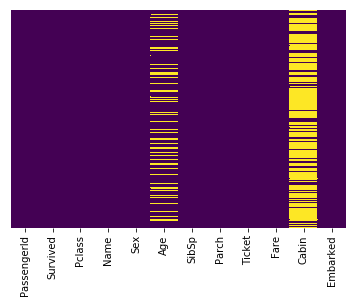

In [4]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')


## since cabin has more missing values we drop the cabin column-data cleaning

In [5]:
titanic.drop(columns=['Cabin'],inplace=True)

In [6]:
titanic.head()# we observe that the cabin is not found

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Data wrangling-fill the age column

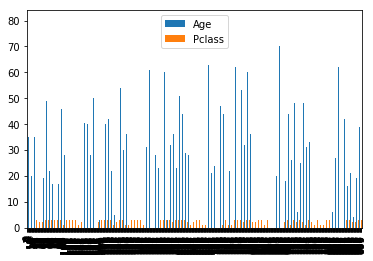

In [7]:
titanic[['Age','Pclass']].plot.bar()


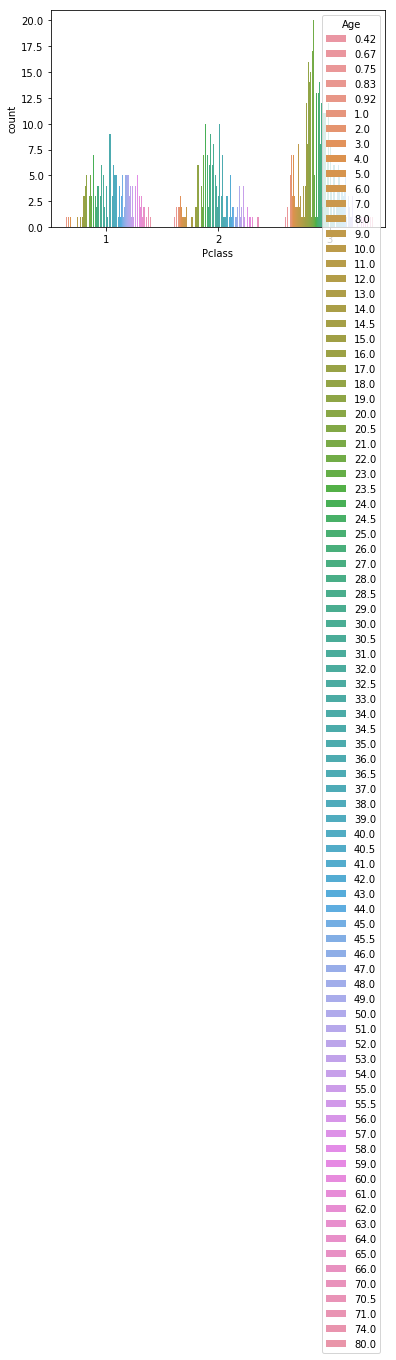

In [8]:
sns.countplot(x='Pclass',hue='Age',data=titanic)

## since the visualization is not that good we use boxplot

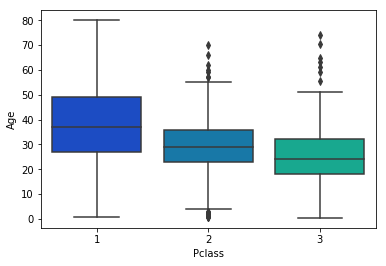

In [9]:
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')# it prints the statistics-count neam min std etc


In [10]:
titanic.describe() # this is used to get the statistics


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# apply statistics on a single column
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
# fill the missing values in age by the median as per the class

In [13]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age
        
titanic['Age']=titanic[['Age','Pclass']].apply(fill_age,axis=1)
titanic['Age'].isnull().sum()# this shows that there are no null values in the age column
        
    

0

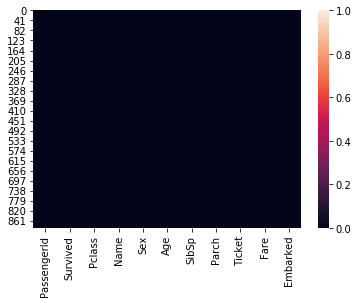

In [14]:
sns.heatmap(titanic.isnull())


## Find out how many people survived / not survived

In [15]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

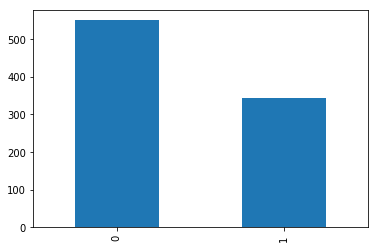

In [16]:
# visualizing the data 
titanic['Survived'].value_counts().plot.bar()

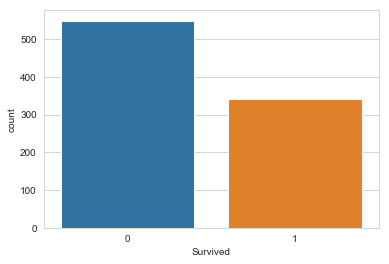

In [17]:
# another way
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)


## find out how many male and female survived / not survived- assignment

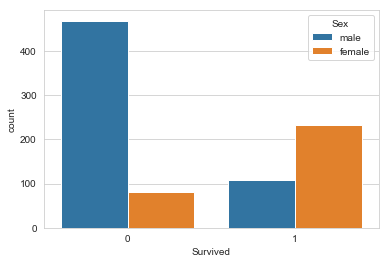

In [18]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

## find out which class people survived / not survived- assignment

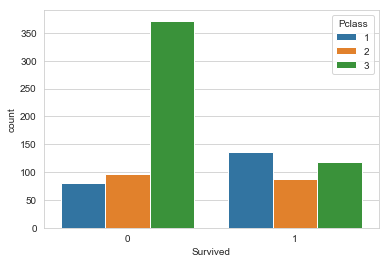

In [19]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

##  find avg age of people present in titanic

In [20]:
titanic['Age'].mean()


29.054062850729515

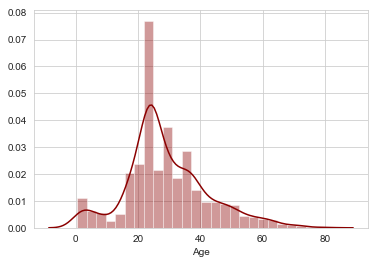

In [21]:
sns.distplot(titanic['Age'].dropna(),color='darkred',kde=True)# kde is the density curve so if it is false it disappears

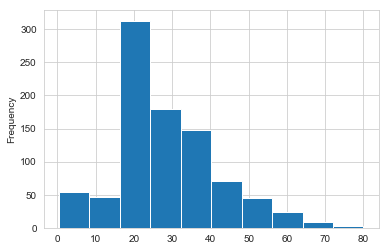

In [22]:
titanic['Age'].plot.hist()# my way


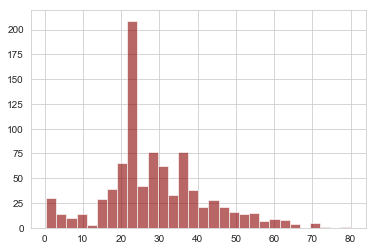

In [23]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.6)# alpha changes the transparency no need to use matplot n all here we directly applied it on column

## find out how many people having siblings  & spouse-assignment

In [24]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

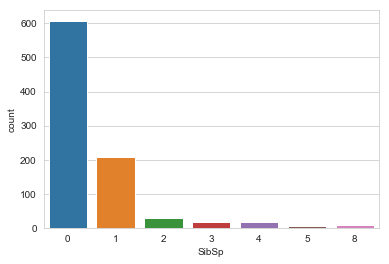

In [25]:
sns.countplot(x='SibSp',data=titanic)

## find the avg fare of tickets-assignment

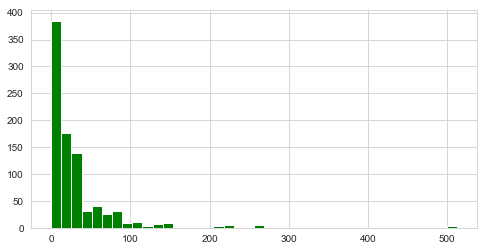

In [34]:
titanic['Fare'].hist(color='Green',bins=40,figsize=(8,4))

In [32]:
titanic['Fare'].mean()

32.2042079685746

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


## converting the embarked column to category data- ie converting to 0 and 1's 

In [36]:
titanic['Embarked'].value_counts()# will give the values of s c q

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:

a=titanic['Embarked'].str.get_dummies()# one hot encoding


In [59]:
new=pd.concat([titanic,a],axis=1)# concatinating the dataframes
new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,1


In [60]:
new.drop(columns=['Embarked'],inplace=True)
new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,0,1


In [61]:
b=pd.get_dummies(titanic['Sex'])
b

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [63]:
new1=pd.concat([new,b],axis=1)
new1.drop(columns=['Sex'],inplace=True)
new1

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",24.0,0,0,330877,8.4583,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,1,0,0,1,0
